In [1]:
import requests
import pandas as pd
import numpy as np
import os

## 第一部分 导入WeRateDogs 的推特档案、推特图像的预测数据、附加数据

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
r=requests.get('https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv')

In [4]:
folder_name = 'dograting'

if not os.path.exists(folder_name):

	os.makedirs(folder_name)


In [5]:
with open(os.path.join(folder_name,'dog_predict.tsv'),mode='wb') as file:
    file.write(r.content)

In [6]:
dog_predict=pd.read_csv('dograting/dog_predict.tsv',sep='\t', header=0)
dog_predict.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


附加数据由于Twitter developer账号暂不支持，无法直接得到，于是直接采用课程组的文件。

In [7]:
data=[]
file = open('tweet_json.txt', 'r')
for i in file.readlines():
    data.append(i)

twitter_add = pd.DataFrame(data)
twitter_add.head()

,0
0,"{""created_at"": ""Tue Aug 01 16:23:56 +0000 2017..."
1,"{""created_at"": ""Tue Aug 01 00:17:27 +0000 2017..."
2,"{""created_at"": ""Mon Jul 31 00:18:03 +0000 2017..."
3,"{""created_at"": ""Sun Jul 30 15:58:51 +0000 2017..."
4,"{""created_at"": ""Sat Jul 29 16:00:24 +0000 2017..."


In [8]:
twitter_add['id']=twitter_add[0].map(lambda x:x.split(',')[1])
twitter_add['created_at']=twitter_add[0].map(lambda x:x.split(',')[0])
twitter_add['full_text']=twitter_add[0].map(lambda x:x.split(',')[3])
twitter_add['retweet_count']=twitter_add[0].map(lambda x:x.split(',')[-7])
twitter_add['favorite_count']=twitter_add[0].map(lambda x:x.split(',')[-6])

In [9]:
twitter_add=twitter_add.drop([0],axis=1)

## 第二部分、对项目数据进行评估

In [10]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
twitter_archive.text[1]

"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV"

In [12]:
#查询狗子地位
texts=[]
for text in twitter_archive.text:
    t1=text[-40:-29]
    texts.append(t1)

In [13]:
twitter_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 5 columns):
id                2352 non-null object
created_at        2352 non-null object
full_text         2352 non-null object
retweet_count     2352 non-null object
favorite_count    2352 non-null object
dtypes: object(5)
memory usage: 92.0+ KB


In [14]:
twitter_add.duplicated().sum()

0

质量

twitter_archive表格

- in_reply_to_status_id和in_reply_to_user_id大量缺失
- retweeted_status_id和retweeted_status_user_id、retweeted_status_timestamp大量缺失
- timestamp	数据类型错误
- source 一列冗余信息太多
- 狗狗类型puppo缺失
- rating_number中11.27/10被判定为27（增补）

twitter_add表格

- 每列都带有大量冗杂
- retweet信息中混入lang": "en"}  
- favorates信息中混入"is_quote_status": false
- 数据类型错误（需要转为整数）

整洁度

- twitter_archive表格中狗狗分类四列一个变量
- twitter_add是twitter_archive的一部分

## 第三部分、数据的整理

In [15]:
archive_clean=twitter_archive.copy()

In [16]:
add_clean=twitter_add.copy()

In [17]:
dog_clean=dog_predict.copy()

最好剔除掉dog_clean中被预测不是狗狗的数据。

In [18]:
dog_clean=dog_clean[dog_clean['p1_dog']== True]

in_reply_to_status_id和in_reply_to_user_id大量缺失

retweeted_status_id和retweeted_status_user_id大量缺失

定义：清除涉及的四列

In [19]:
archive_clean=archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1)

检验：

In [20]:
archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


source 一列冗余信息太多

定义：使用正则提取方法，对source一列取两组尖括号中的值

In [21]:
archive_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [22]:
archive_clean['source']=archive_clean.source.str.extract(r'\>(\D+)\<',expand=True)

检验

In [23]:
archive_clean.sample(4)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2084,670807719151067136,2015-11-29 03:33:17 +0000,Twitter for iPhone,"Say hello to Andy. He can balance on one foot,...",https://twitter.com/dog_rates/status/670807719...,11,10,Andy,None,None,None,None
1092,737322739594330112,2016-05-30 16:40:14 +0000,Twitter for iPhone,Say hello to Lily. She's not injured or anythi...,https://twitter.com/dog_rates/status/737322739...,9,10,Lily,None,None,None,None
877,760893934457552897,2016-08-03 17:43:45 +0000,Twitter for iPhone,This is Wishes. He has the day off. Daily stru...,https://twitter.com/dog_rates/status/760893934...,11,10,Wishes,doggo,None,None,None
1542,689599056876867584,2016-01-20 00:03:21 +0000,Twitter for iPhone,Here we see 33 dogs posing for a picture. All ...,https://twitter.com/dog_rates/status/689599056...,11,10,None,None,None,None,None


timestamp 数据类型错误

定义：通过datetime函数转变数据类型。

In [24]:
#去掉末尾的+0
archive_clean.timestamp=archive_clean.timestamp.str[0:-6]

In [25]:
archive_clean.timestamp=pd.to_datetime(archive_clean.timestamp,format='%Y-%m-%d %H:%M:%S')
#检验
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 221.0+ KB


狗狗地位缺失较多


定义：翻检原始数据发现填充困难，暂时搁置。

随后在将四列合并时，再将有意义的值取出。

In [26]:
archive_clean[archive_clean['tweet_id']==889665388333682689]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
12,889665388333682689,2017-07-25 01:55:32,Twitter for iPhone,Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo


In [27]:
archive_clean.replace('None','')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,,,
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,,,
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,,,
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,,,
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,,,
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,,,,,
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,,,,
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,,,,,
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,,,,
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,,,


rating_number中11.27/10被判定为27

定义：直接替换表格内的值

In [28]:
archive_clean.rating_numerator=archive_clean.rating_numerator.replace(27,11.27)

In [29]:
#检验为空
archive_clean[archive_clean['rating_numerator']==27]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


add_clean每列大量冗杂

定义：每列进行精准截取

In [30]:
add_clean['tweet_id']=add_clean.id.str[6:]
add_clean.created_at=add_clean.created_at.str[16:-1]
add_clean.full_text=add_clean.full_text.str[15:-1]
add_clean.retweet_count=add_clean.retweet_count.str[17:]
add_clean.favorite_count=add_clean.favorite_count.str[19:]

In [31]:
add_clean=add_clean.drop(['id'],axis=1)
add_clean.head(5)

,created_at,full_text,retweet_count,favorite_count,tweet_id
0,Tue Aug 01 16:23:56 +0000 2017,This is Phineas. He's a mystical boy. Only eve...,8842,39492,892420643555336193
1,Tue Aug 01 00:17:27 +0000 2017,This is Tilly. She's just checking pup on you....,6480,33786,892177421306343426
2,Mon Jul 31 00:18:03 +0000 2017,This is Archie. He is a rare Norwegian Pouncin...,4301,25445,891815181378084864
3,Sun Jul 30 15:58:51 +0000 2017,This is Darla. She commenced a snooze mid meal...,8925,42863,891689557279858688
4,Sat Jul 29 16:00:24 +0000 2017,This is Franklin. He would like you to stop ca...,9721,41016,891327558926688256


retweet信息中混入lang": "en"}

favorates信息中混入"is_quote_status": false

定义：在原文件中查询，如无意义两列中删除相关内容

In [32]:
add_clean[add_clean.retweet_count=="null"]
#查看后发现是正常数据缺失，替换为NaN

,created_at,full_text,retweet_count,favorite_count,tweet_id
29,Sat Jul 15 16:51:35 +0000 2017,@NonWhiteHat @MayhewMayhem omg hello tanner yo...,null,false,886267009285017600
54,Sun Jul 02 21:58:53 +0000 2017,@roushfenway These are good dogs but 17/10 is ...,null,false,881633300179243008
63,Tue Jun 27 12:14:36 +0000 2017,@RealKentMurphy 14/10 confirmed,null,false,879674319642796034
112,Fri Jun 02 19:38:25 +0000 2017,@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,null,false,870726314365509632
146,Sat May 13 16:15:35 +0000 2017,@Jack_Septic_Eye I'd need a few more pics to p...,null,false,863427515083354112
176,Wed Apr 26 12:48:51 +0000 2017,@Marc_IRL pixelated af 12/10,null,false,857214891891077121
183,Sun Apr 23 23:26:03 +0000 2017,@xianmcguire @Jenna_Marbles Kardashians wouldn...,null,false,856288084350160898
185,Sat Apr 22 19:15:32 +0000 2017,@dhmontgomery We also gave snoop dogg a 420/10...,null,false,855862651834028034
186,Sat Apr 22 19:05:32 +0000 2017,@s8n You tried very hard to portray this good ...,null,false,855860136149123072
215,Fri Apr 07 13:04:55 +0000 2017,@markhoppus MARK THAT DOG HAS SEEN AND EXPERIE...,null,false,850333567704068097


In [33]:
add_clean.retweet_count.replace('null',np.nan,inplace=True)

In [34]:
add_clean.retweet_count.replace('',np.nan,inplace=True)

In [35]:
add_clean.retweet_count.value_counts()

 745      5
 1280     5
 701      4
 606      4
 312      4
 1554     4
 468      4
 680      4
 1036     3
 5024     3
 402      3
 8471     3
 37       3
 542      3
 1060     3
 401      3
 252      3
 1165     3
 1309     3
 315      3
 363      3
 610      3
 902      3
 985      3
 1201     3
 62       3
 230      3
 521      3
 321      3
 9320     3
         ..
 3488     1
 19563    1
 2622     1
 1753     1
 8882     1
 824      1
 763      1
 4042     1
 1152     1
 4890     1
 4351     1
 507      1
 3103     1
 7043     1
 137      1
 1132     1
 250      1
 1068     1
 4597     1
 2437     1
 4825     1
 2418     1
 150      1
 4478     1
 76       1
 1223     1
 3206     1
 1680     1
 3297     1
 1493     1
Name: retweet_count, Length: 1718, dtype: int64

In [36]:
add_clean.favorite_count.replace(' false',np.nan,inplace=True)
add_clean.favorite_count.value_counts()

0        94
2417      3
3508      3
343       3
689       3
1526      3
3548      3
465       3
1753      3
520       3
171       3
1788      2
1204      2
2049      2
7579      2
6486      2
5565      2
7292      2
801       2
2357      2
2286      2
9426      2
1861      2
2512      2
2892      2
4146      2
3097      2
711       2
608       2
1680      2
         ..
29552     1
17408     1
1551      1
1660      1
4004      1
2443      1
1495      1
3086      1
17460     1
5319      1
847       1
18547     1
233       1
17001     1
3826      1
9069      1
637       1
26859     1
10769     1
480       1
3072      1
4114      1
7470      1
1434      1
435       1
899       1
6303      1
10947     1
10273     1
17419     1
Name: favorite_count, Length: 1973, dtype: int64

数据类型错误

定义：tweet_id和retweet_count和favorite_count需要转为整数

In [37]:
#尝试转变时报错‘cannot convert float NaN to integer’
#再把所有的NaN转变为0
add_clean.fillna(0,inplace=True)

In [38]:
add_clean.isnull().sum()

created_at        0
full_text         0
retweet_count     0
favorite_count    0
tweet_id          0
dtype: int64

In [39]:
add_clean.tweet_id=add_clean.tweet_id.astype(int)
add_clean.retweet_count=add_clean.retweet_count.astype(int)
add_clean.favorite_count=add_clean.favorite_count.astype(int)

In [40]:
add_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 5 columns):
created_at        2352 non-null object
full_text         2352 non-null object
retweet_count     2352 non-null int64
favorite_count    2352 non-null int64
tweet_id          2352 non-null int64
dtypes: int64(3), object(2)
memory usage: 92.0+ KB


再来考虑整洁度

twitter_archive表格中狗狗分类四列一个变量

定义：使用melt将狗狗的position 集中到一列


In [41]:
archive_clean.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,None,None,None,None


In [42]:
archive_clean = pd.melt(archive_clean, id_vars=['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls','rating_numerator','rating_denominator','name'],
                           var_name='pos_name',value_name='position')

In [43]:
archive_clean=archive_clean[archive_clean.position != 'None']
archive_clean=archive_clean.drop(['pos_name'],axis=1)

twitter_add是twitter_archive的一部分

以tweet_id合并两个表

In [44]:
tweet_2=pd.merge(archive_clean,add_clean,how='left',on='tweet_id')
tweet_2

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,position,created_at,full_text,retweet_count,favorite_count
0,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10,Cassie,doggo,Wed Jul 26 15:59:51 +0000 2017,This is Cassie. She is a college pup. Studying...,7684,32467
1,884162670584377345,2017-07-09 21:29:42,Twitter for iPhone,Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12.0,10,Yogi,doggo,Sun Jul 09 21:29:42 +0000 2017,Meet Yogi. He doesn't have any important dog m...,3099,20719
2,872967104147763200,2017-06-09 00:02:31,Twitter for iPhone,Here's a very large dog. He has a date later. ...,https://twitter.com/dog_rates/status/872967104...,12.0,10,None,doggo,Fri Jun 09 00:02:31 +0000 2017,Here's a very large dog. He has a date later. ...,5632,27918
3,871515927908634625,2017-06-04 23:56:03,Twitter for iPhone,This is Napolean. He's a Raggedy East Nicaragu...,https://twitter.com/dog_rates/status/871515927...,12.0,10,Napolean,doggo,Sun Jun 04 23:56:03 +0000 2017,This is Napolean. He's a Raggedy East Nicaragu...,3608,20687
4,871102520638267392,2017-06-03 20:33:19,Twitter for iPhone,Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,https://twitter.com/animalcog/status/871075758...,14.0,10,None,doggo,Sat Jun 03 20:33:19 +0000 2017,Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,5729,21403
5,869596645499047938,2017-05-30 16:49:31,Twitter for iPhone,This is Scout. He just graduated. Officially a...,https://twitter.com/dog_rates/status/869596645...,12.0,10,Scout,doggo,Tue May 30 16:49:31 +0000 2017,This is Scout. He just graduated. Officially a...,3300,16431
6,858843525470990336,2017-05-01 00:40:27,Twitter for iPhone,I have stumbled puppon a doggo painting party....,https://twitter.com/dog_rates/status/858843525...,13.0,10,None,doggo,Mon May 01 00:40:27 +0000 2017,I have stumbled puppon a doggo painting party....,3746,16242
7,855851453814013952,2017-04-22 18:31:02,Twitter for iPhone,Here's a puppo participating in the #ScienceMa...,https://twitter.com/dog_rates/status/855851453...,13.0,10,None,doggo,Sat Apr 22 18:31:02 +0000 2017,Here's a puppo participating in the #ScienceMa...,19118,47679
8,854010172552949760,2017-04-17 16:34:26,Twitter for iPhone,"At first I thought this was a shy doggo, but i...",https://twitter.com/dog_rates/status/854010172...,11.0,10,None,doggo,Mon Apr 17 16:34:26 +0000 2017,At first I thought this was a shy dogg,3419,17120
9,851953902622658560,2017-04-12 00:23:33,Twitter for iPhone,RT @dog_rates: This is Astrid. She's a guide d...,https://twitter.com/dog_rates/status/829374341...,13.0,10,Astrid,doggo,Wed Apr 12 00:23:33 +0000 2017,RT @dog_rates: This is Astrid. She's a guide d...,10647,0


In [45]:
tweet_all=pd.merge(tweet_2,dog_clean,how='left',on='tweet_id')
tweet_all

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,position,created_at,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10,Cassie,doggo,Wed Jul 26 15:59:51 +0000 2017,...,1.0,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
1,884162670584377345,2017-07-09 21:29:42,Twitter for iPhone,Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12.0,10,Yogi,doggo,Sun Jul 09 21:29:42 +0000 2017,...,1.0,German_shepherd,0.707046,True,malinois,0.199396,True,Norwegian_elkhound,0.049148,True
2,872967104147763200,2017-06-09 00:02:31,Twitter for iPhone,Here's a very large dog. He has a date later. ...,https://twitter.com/dog_rates/status/872967104...,12.0,10,None,doggo,Fri Jun 09 00:02:31 +0000 2017,...,2.0,Labrador_retriever,0.476913,True,Chesapeake_Bay_retriever,0.174145,True,German_short-haired_pointer,0.092861,True
3,871515927908634625,2017-06-04 23:56:03,Twitter for iPhone,This is Napolean. He's a Raggedy East Nicaragu...,https://twitter.com/dog_rates/status/871515927...,12.0,10,Napolean,doggo,Sun Jun 04 23:56:03 +0000 2017,...,2.0,komondor,0.974781,True,briard,0.020041,True,swab,0.003228,False
4,871102520638267392,2017-06-03 20:33:19,Twitter for iPhone,Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,https://twitter.com/animalcog/status/871075758...,14.0,10,None,doggo,Sat Jun 03 20:33:19 +0000 2017,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,869596645499047938,2017-05-30 16:49:31,Twitter for iPhone,This is Scout. He just graduated. Officially a...,https://twitter.com/dog_rates/status/869596645...,12.0,10,Scout,doggo,Tue May 30 16:49:31 +0000 2017,...,1.0,Chihuahua,0.955156,True,toy_terrier,0.008054,True,muzzle,0.006296,False
6,858843525470990336,2017-05-01 00:40:27,Twitter for iPhone,I have stumbled puppon a doggo painting party....,https://twitter.com/dog_rates/status/858843525...,13.0,10,None,doggo,Mon May 01 00:40:27 +0000 2017,...,1.0,golden_retriever,0.578120,True,Labrador_retriever,0.286059,True,bloodhound,0.026917,True
7,855851453814013952,2017-04-22 18:31:02,Twitter for iPhone,Here's a puppo participating in the #ScienceMa...,https://twitter.com/dog_rates/status/855851453...,13.0,10,None,doggo,Sat Apr 22 18:31:02 +0000 2017,...,1.0,flat-coated_retriever,0.321676,True,Labrador_retriever,0.115138,True,groenendael,0.096100,True
8,854010172552949760,2017-04-17 16:34:26,Twitter for iPhone,"At first I thought this was a shy doggo, but i...",https://twitter.com/dog_rates/status/854010172...,11.0,10,None,doggo,Mon Apr 17 16:34:26 +0000 2017,...,1.0,English_springer,0.354733,True,collie,0.177538,True,Border_collie,0.131706,True
9,851953902622658560,2017-04-12 00:23:33,Twitter for iPhone,RT @dog_rates: This is Astrid. She's a guide d...,https://twitter.com/dog_rates/status/829374341...,13.0,10,Astrid,doggo,Wed Apr 12 00:23:33 +0000 2017,...,1.0,Staffordshire_bullterrier,0.757547,True,American_Staffordshire_terrier,0.149950,True,Chesapeake_Bay_retriever,0.047523,True


In [46]:
#查询当前的工作路径
os.getcwd()

'/home/workspace'

In [47]:
tweet_all.to_csv('twitter_archive_master.csv')

### 第四部分、可视化

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style('darkgrid')
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe9c7d18eb8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fe9c5b8c278>]], dtype=object)

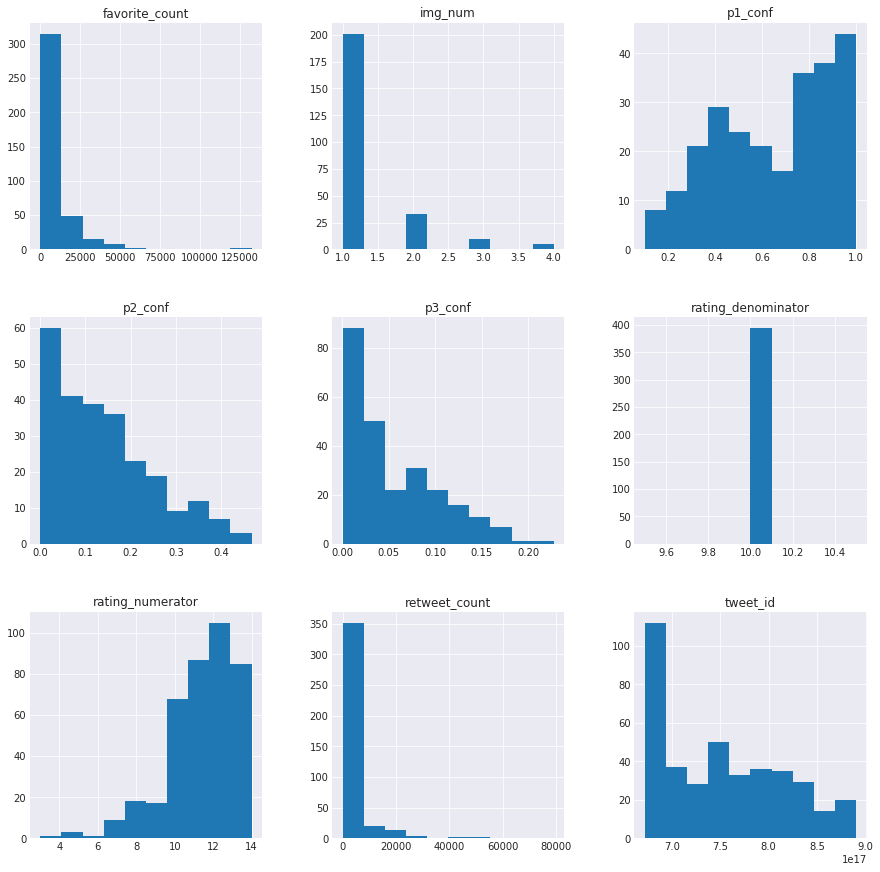

In [49]:
#进行基本信息概览
tweet_all.hist(figsize=(15,15))

通过上图可以看出：
1、favorite和retweet统计形状都明显右偏。大部分favorite或retweet数字都在20000以下，但最高值分别达到了125000和80000

2、不同图片的预测可信度差异较大。第一张图呈现左偏，一半以上案例的预测可信度都超过0.5；而第二张图和第三张图的统计形态都是右偏，大部分案例预测可信度都在0.2以下。

3、狗狗评分大都在8-15分之间，最低的低于5分，最高的27分。（经后续整理修正后，最高分为14分）

In [50]:
tweet_all[tweet_all['rating_numerator']>25]
#检查原推特发现应该是11.27分，返回进行清理

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,position,created_at,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [51]:
tweet_all[tweet_all['rating_numerator']<5]
#查看原推，3分的是只猫

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,position,created_at,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
255,693590843962331137,2016-01-31 00:25:18,Twitter for iPhone,Meet Phil. He's big af. Currently destroying t...,https://twitter.com/dog_rates/status/693590843...,3.0,10,Phil,pupper,Sun Jan 31 00:25:18 +0000 2016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


然后探索狗狗评分和地位、品种等变量的关系

In [52]:
kind = tweet_all[['p1','rating_numerator']]
kind1=kind.dropna(axis = 0)

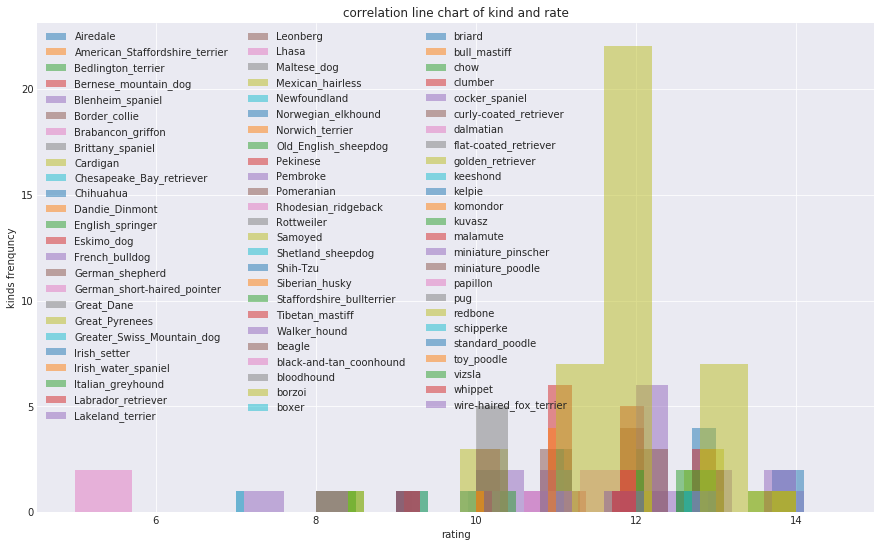

In [98]:
kind1.groupby(['p1'])['rating_numerator'].plot(kind='hist',alpha=0.5,figsize=(15,9))
plt.title('correlation line chart of kind and rate')
plt.xlabel('rating')
plt.ylabel('kinds frenquncy')
plt.legend(loc='upper left',ncol=3)

预想中不同品种的狗可能颜值区间会有差异，但在图表中看出评分靠前但犬类驳杂，可见评分者并无明显偏好。

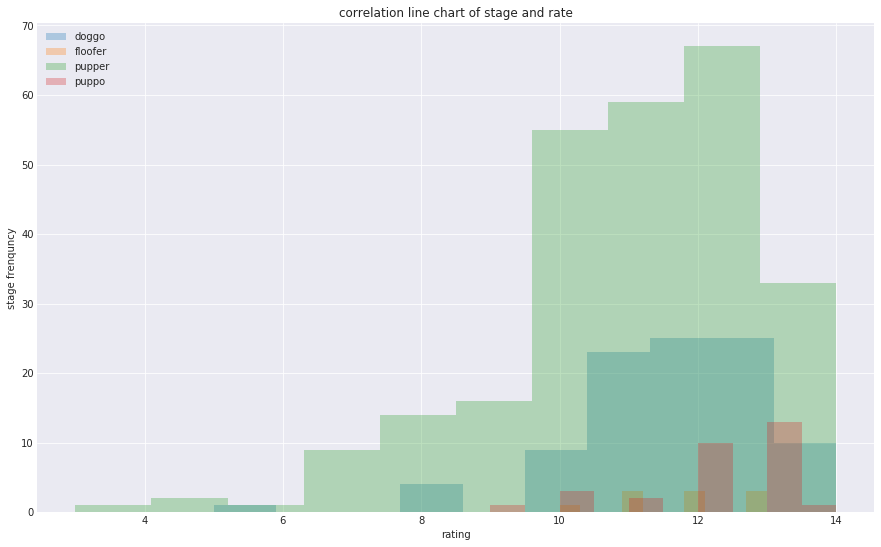

In [54]:
tweet_all.groupby(['position'])['rating_numerator'].plot(kind='hist',alpha=0.3,figsize=(15,9))
plt.title('correlation line chart of stage and rate')
plt.xlabel('rating')
plt.ylabel('stage frenquncy')
plt.legend(loc='upper left')

从总体形态来看，puppo和pupper似乎更受欢迎。

3、下一步，对推文内容制作词云。

In [55]:
from wordcloud import WordCloud

In [56]:
texts=[]
for i in tweet_all.text:
    i=i.split('/10')[0]
    texts.append(i)
    
texts_str=(" ".join(texts))
texts_str

'This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14 Meet Yogi. He doesn\'t have any important dog meetings today he just enjoys looking his best at all times. 12 Here\'s a very large dog. He has a date later. Politely asked this water person to check if his breath is bad. 12 This is Napolean. He\'s a Raggedy East Nicaraguan Zoom Zoom. Runs on one leg. Built for deception. No eyes. Good with kids. 12 Never doubt a doggo 14 This is Scout. He just graduated. Officially a doggo now. Have fun with taxes and losing sight of your ambitions. 12 I have stumbled puppon a doggo painting party. They\'re looking to be the next Pupcasso or Puppollock. All 13 Here\'s a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13 At first I thought this was a shy doggo, but it\'s actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11 RT @dog_rates: This is Astrid. She\'s a guide doggo in training. 13 This is

In [57]:
wordcloud = WordCloud().generate(texts_str)

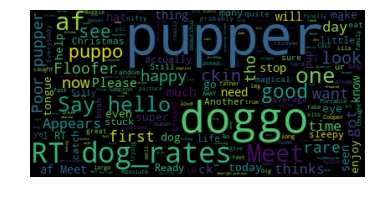

In [58]:
#max_font_size设定生成词云中的文字最大大小
#width,height,margin可以设置图片属性
# generate 可以对全部文本进行自动分词
wordcloud = WordCloud(max_font_size=66).generate(texts_str)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()